In [1]:
import torch
import os
import tiktoken
from tqdm import tqdm
import torch.nn as nn
import torch.nn.functional as F

device = 'mps'

In [2]:
torch.__version__

'2.2.0.dev20231129'

In [2]:
text_dir = "maildir"
out_file = "data/all.txt"
os.makedirs('data', exist_ok=True)

with open(out_file, 'w+') as out_f:
    for employee in tqdm(sorted(os.listdir(text_dir))):
        path = os.path.join(text_dir, employee, "all_documents")
        if not os.path.exists(path):
            print(f"could not read all_documents for {employee}, trying inbox...")
            path = os.path.join(text_dir, employee, "inbox")
            if not os.path.exists(path):
                continue
        for fname in os.listdir(path):
            try:
                with open(os.path.join(path, fname), "r") as in_f:
                    out_f.write(in_f.read())
            except Exception as e:
                pass

  2%|▊                                          | 3/151 [00:00<00:07, 20.50it/s]

could not read all_documents for .DS_Store, trying inbox...


  6%|██▌                                        | 9/151 [00:00<00:13, 10.49it/s]

could not read all_documents for blair-l, trying inbox...


 13%|█████▎                                    | 19/151 [00:01<00:06, 20.54it/s]

could not read all_documents for causholli-m, trying inbox...
could not read all_documents for crandell-s, trying inbox...


 16%|██████▋                                   | 24/151 [00:02<00:18,  6.85it/s]

could not read all_documents for donoho-l, trying inbox...


 23%|█████████▍                                | 34/151 [00:03<00:11, 10.36it/s]

could not read all_documents for forney-j, trying inbox...
could not read all_documents for gang-l, trying inbox...
could not read all_documents for geaccone-t, trying inbox...


 33%|█████████████▉                            | 50/151 [00:04<00:08, 11.50it/s]

could not read all_documents for harris-s, trying inbox...
could not read all_documents for holst-k, trying inbox...


 35%|██████████████▋                           | 53/151 [00:04<00:07, 13.61it/s]

could not read all_documents for hyatt-k, trying inbox...


 42%|█████████████████▊                        | 64/151 [00:08<00:17,  5.11it/s]

could not read all_documents for keiser-k, trying inbox...
could not read all_documents for kitchen-l, trying inbox...


 47%|███████████████████▋                      | 71/151 [00:09<00:11,  7.13it/s]

could not read all_documents for lokey-t, trying inbox...
could not read all_documents for lucci-p, trying inbox...


 52%|█████████████████████▋                    | 78/151 [00:10<00:08,  8.31it/s]

could not read all_documents for mccarty-d, trying inbox...
could not read all_documents for mckay-j, trying inbox...


 55%|███████████████████████                   | 83/151 [00:10<00:05, 12.57it/s]

could not read all_documents for meyers-a, trying inbox...
could not read all_documents for motley-m, trying inbox...


 58%|████████████████████████▏                 | 87/151 [00:10<00:06, 10.39it/s]

could not read all_documents for parks-j, trying inbox...


 67%|███████████████████████████▍             | 101/151 [00:11<00:02, 21.65it/s]

could not read all_documents for phanis-s, trying inbox...
could not read all_documents for platter-p, trying inbox...
could not read all_documents for quigley-d, trying inbox...
could not read all_documents for rapp-b, trying inbox...
could not read all_documents for reitmeyer-j, trying inbox...
could not read all_documents for richey-c, trying inbox...
could not read all_documents for ring-r, trying inbox...


 70%|████████████████████████████▊            | 106/151 [00:11<00:02, 16.47it/s]

could not read all_documents for salisbury-h, trying inbox...


 73%|█████████████████████████████▊           | 110/151 [00:12<00:02, 13.73it/s]

could not read all_documents for scholtes-d, trying inbox...
could not read all_documents for schoolcraft-d, trying inbox...


 75%|██████████████████████████████▉          | 114/151 [00:12<00:02, 14.87it/s]

could not read all_documents for semperger-c, trying inbox...


 83%|██████████████████████████████████▏      | 126/151 [00:13<00:01, 12.76it/s]

could not read all_documents for slinger-r, trying inbox...
could not read all_documents for solberg-g, trying inbox...
could not read all_documents for staab-t, trying inbox...
could not read all_documents for steffes-j, trying inbox...
could not read all_documents for stokley-c, trying inbox...
could not read all_documents for swerzbin-m, trying inbox...


 93%|██████████████████████████████████████▎  | 141/151 [00:14<00:00, 13.97it/s]

could not read all_documents for thomas-p, trying inbox...
could not read all_documents for watson-k, trying inbox...


100%|█████████████████████████████████████████| 151/151 [00:15<00:00, 10.06it/s]

could not read all_documents for whitt-m, trying inbox...
could not read all_documents for williams-w3, trying inbox...
Message-ID: <5161987.1075855666285.JavaMail.evans@thyme>
Date: Tue, 12 Dec 2000 05:27:00 -0800 (PST)
From: jsmith@austintx.com
To: phillip.k.allen@enron.com
Subject: RE: stage coach
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: "Jeff Smith" <jsmith@austintx.com>
X-To: <Phillip.K.Allen@enron.com>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\All documents
X-Origin: Allen-P
X-FileName: pallen.nsf

Phillip,

I am completing my marketing package for the Stage.  I also need the 1999
statement and a rent roll.  Please send ASAP.

352202027


In [3]:
out_file = "data/all.txt"

with open(out_file, 'r') as data_f:
    text = data_f.read()

print(text[:600])
print(len(text))

Message-ID: <5161987.1075855666285.JavaMail.evans@thyme>
Date: Tue, 12 Dec 2000 05:27:00 -0800 (PST)
From: jsmith@austintx.com
To: phillip.k.allen@enron.com
Subject: RE: stage coach
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: "Jeff Smith" <jsmith@austintx.com>
X-To: <Phillip.K.Allen@enron.com>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\All documents
X-Origin: Allen-P
X-FileName: pallen.nsf

Phillip,

I am completing my marketing package for the Stage.  I also need the 1999
statement and a rent roll.  Please send ASAP.

352202027


In [4]:
enc = tiktoken.get_encoding('r50k_base')
encoded = enc.encode(text)
print(len(encoded))
print(encoded[:100])

122526421
[12837, 12, 2389, 25, 1279, 47493, 27301, 13, 940, 38569, 2816, 27310, 26279, 13, 29584, 25804, 13, 1990, 504, 31, 20057, 1326, 29, 198, 10430, 25, 30030, 11, 1105, 4280, 4751, 8870, 25, 1983, 25, 405, 532, 2919, 405, 357, 47, 2257, 8, 198, 4863, 25, 474, 21453, 31, 64, 436, 600, 87, 13, 785, 198, 2514, 25, 872, 359, 541, 13, 74, 13, 439, 268, 31, 268, 1313, 13, 785, 198, 19776, 25, 4526, 25, 3800, 3985, 198, 44, 524, 12, 14815, 25, 352, 13, 15, 198, 19746, 12, 6030, 25, 2420, 14, 25638, 26, 34534, 316, 28, 385]


In [5]:
data = torch.tensor(encoded, dtype=torch.long)
n = int(0.9 * len(data))
train_data = data[:n]
dev_data = data[n:]
print(f"Train: {len(train_data)}, Dev: {len(dev_data)}")

Train: 110273778, Dev: 12252643


In [658]:
torch.manual_seed(1)

context_length = 128
batch_size = 8

def get_batch(split, batch_size=batch_size):
    data = train_data if split == 'train' else dev_data
    ix = torch.randint(len(data) - context_length, (batch_size,))
    x = torch.stack([data[i:i+context_length] for i in ix])
    y = torch.stack([data[i+1:i+context_length+1] for i in ix])
    x = x.to(device)
    y = y.to(device)
    return x, y

get_batch('train')[0].shape

torch.Size([8, 128])

In [659]:
# head_size = 16
import math

torch.manual_seed(1)
n_head = 4


class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(n_embed, 4*n_embed)
        self.relu = nn.ReLU()
        self.proj = nn.Linear(4*n_embed, n_embed)

    def forward(self, x):
        x = self.relu(self.hidden(x))
        x = self.proj(x)
        return x

    def forward_embedding(self, x):
        x = self.relu(self.hidden(x))
        return x
        

class Head(nn.Module):
    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embed, head_size, bias=False)
        self.query = nn.Linear(n_embed, head_size, bias=False)
        self.value = nn.Linear(n_embed, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(context_length, context_length)))

    def forward(self, x):
        # out = nn.scaled_dot_product_attention(self.key, self.query, self.value, causal=True)
        # return out

        B, T, C = x.shape
        k = self.key(x)
        q = self.query(x)
        scale_factor = 1 / math.sqrt(C)
        attn_weights = q @ k.transpose(-2, -1) * scale_factor
        attn_weights = attn_weights.masked_fill(self.tril[:T, :T] == 0, float('-inf'))
        attn_weights = F.softmax(attn_weights, dim=-1)
        v = self.value(x)
        out = attn_weights @ v
        return out
        
class MultiHeadAttention(nn.Module):
    def __init__(self):
        super().__init__()
        self.heads = nn.ModuleList([Head(n_embed//n_head) for _ in range(n_head)])

    def forward(self, x):
        x = torch.cat([h(x) for h in self.heads], dim=-1)
        return x

class Block(nn.Module):
    def __init__(self):
        super().__init__()
        self.ln1 = nn.LayerNorm(n_embed)
        self.attn = MultiHeadAttention()
        self.ln2 = nn.LayerNorm(n_embed)
        self.mlp = MLP()

    def forward(self, x):
        x = x + self.attn(self.ln1(x))
        x = x + self.mlp(self.ln2(x))
        # x = x + self.attn(x)
        # x = x + self.mlp(x)
        return x

    def forward_embedding(self, x):
        x = x + self.attn(self.ln1(x))
        x = x + self.mlp(self.ln2(x))
        # x = self.mlp.forward_embedding(self.ln2(x))
        return x

In [660]:
import torch.nn as nn
import torch.nn.functional as F

vocab_size = 50304
n_embed = 128

class Transformer(nn.Module):
    def __init__(self):
        super().__init__()
        self.token_embed = nn.Embedding(vocab_size, n_embed)
        self.position_embed = nn.Embedding(context_length, n_embed)
        self.attn_block = Block()
        self.layer_norm = nn.LayerNorm(n_embed)
        self.lm_head = nn.Linear(n_embed, vocab_size)

    def _pre_attn_pass(self, idx):
        B, T = idx.shape
        tok_embedding = self.token_embed(idx)
        pos_embedding = self.position_embed(torch.arange(T, device=device))
        return tok_embedding + pos_embedding

    def forward(self, idx, targets=None):
        x = self._pre_attn_pass(idx)
        x = self.attn_block(x)
        x = self.layer_norm(x)
        logits = self.lm_head(x)
        loss = None
        if targets is not None:
            B, T, C = logits.shape
            flat_logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(flat_logits, targets)
        return logits, loss

    def generate(self, idx, max_new_tokens):
        for _ in range(max_new_tokens):
            idx_cond = idx[:, -context_length:]
            logits, _ = self(idx_cond)
            logits = logits[:, -1, :]
            probs = F.softmax(logits, dim=-1)
            idx_next = torch.multinomial(probs, num_samples=1)
            idx = torch.cat((idx, idx_next), dim=1)
        return idx

    def forward_embedding(self, idx):
        x = self._pre_attn_pass(idx)
        x = self.attn_block.forward_embedding(x)
        return x
            
        

In [661]:
def count_params(m):
    print(sum(p.numel() for p in m.parameters()))

In [662]:
model = Transformer()
model = model.to(device)
print(model)
count_params(model)

Transformer(
  (token_embed): Embedding(50304, 128)
  (position_embed): Embedding(128, 128)
  (attn_block): Block(
    (ln1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    (attn): MultiHeadAttention(
      (heads): ModuleList(
        (0-3): 4 x Head(
          (key): Linear(in_features=128, out_features=32, bias=False)
          (query): Linear(in_features=128, out_features=32, bias=False)
          (value): Linear(in_features=128, out_features=32, bias=False)
        )
      )
    )
    (ln2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    (mlp): MLP(
      (hidden): Linear(in_features=128, out_features=512, bias=True)
      (relu): ReLU()
      (proj): Linear(in_features=512, out_features=128, bias=True)
    )
  )
  (layer_norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
  (lm_head): Linear(in_features=128, out_features=50304, bias=True)
)
13126144


In [663]:
eval_iters = 20

@torch.no_grad()
def estimate_loss(steps=eval_iters):
    out = {}
    model.eval()
    for split in ['train', 'dev']:
        losses = torch.zeros(steps)
        for k in tqdm(range(steps)):
            xb, yb = get_batch(split)
            logist, loss = model(xb, yb)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

In [664]:
estimate_loss()

100%|███████████████████████████████████████████| 20/20 [00:00<00:00, 60.91it/s]


{'train': tensor(11.0028), 'dev': tensor(11.0048)}

In [665]:
xb, _ = get_batch('train', 2048)
with torch.no_grad():
    model.eval()
    x = model.forward_embedding(xb)
    model.train()
x.shape

torch.Size([2048, 128, 128])

In [666]:
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)
losses = []

Train loss: 2.4535: 100%|█████████████████| 10000/10000 [14:26<00:00, 11.54it/s]


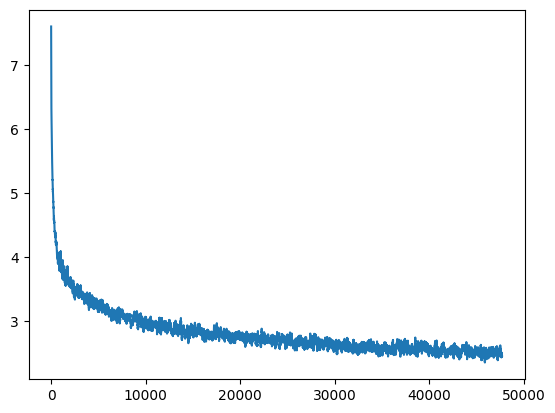

100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 66.51it/s]


{'train': tensor(2.5512), 'dev': tensor(2.9458)}

In [688]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

optimizer.lr = 1e-4
batch_size = 16
n_steps = 10000
avg_window = 64

pbar = tqdm(range(n_steps))
for steps in pbar:
    xb, yb = get_batch('train', batch_size)
    logits, loss = model(xb, yb)
    losses.append(loss.item())
    pbar.set_description(f"Train loss: {np.mean(losses[-avg_window:]):.4f}")
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

plt.plot(moving_average(losses, avg_window))
plt.show()
estimate_loss(200)

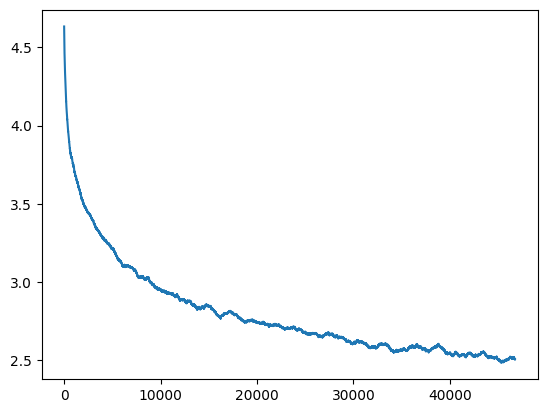

In [689]:
plt.plot(moving_average(losses, 1000))

In [692]:
train_loss, dev_loss = estimate_loss(1000).values()
train_loss

100%|███████████████████████████████████████| 1000/1000 [00:13<00:00, 73.87it/s]


tensor(2.4868)

In [693]:
path = f"models/transformer_128_0_{dev_loss:.3f}.pt"
os.makedirs('models', exist_ok=True)

torch.save({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'train_loss': train_loss,
            'dev_loss': dev_loss,
            # 'steps': len(losses),
            }, path)

In [700]:
checkpoint = torch.load(path)
model = Transformer().to(device)
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [702]:
idx = torch.tensor(enc.encode('Date:'), dtype=torch.long)[None, :].to(device)
# torch.manual_seed(1)
with torch.no_grad():
    print(enc.decode(model.generate(idx, 512)[0].tolist()))

Date: Tue, 31 Oct 2000 09:18:00 -0700 (PDT)
From: maureen.ray@enron.com
To: janet.moore@enron.com
Subject: Re: Partners stir on Caithness
Miles <rhrlie.h McCreitz@enron.com>;
> Chazian, GM
> Robert
> <Bob.hargras@enron.com>; Fri, 25 Aug 2000 04:05:11 -0700 (PDT)
 
 >> jkmecrisa@cookcoairways.com
> too cool clothesetschards.Message-ID: <28013007.10758601596.JavaMail.evans@thyme>
Date: Fri, 12 Oct 2000 19:43:00 -0700 (PDT)
From: Bobby Bigle Hotel
Cc: michael.eubran@enron.com
To: mark.guzman@enron.com
Subject: FW: ATL________F Pitch
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Jeff Dasovich
X-To: Alan Comnes, Angela Schwarz, Beverly Aden, Brenda Barreda, Carol Moffett, Cathy Corbin, Chris Long, Kerry Stasiaman, Evan Hughes, Jody Blackburn, Chris Hendrix, Dan LeBelden, Christopher F Calger, Vicki Sharp, Robert Hirtle, sand Myung, Kuehl, Michael Tribolet, Dave Perrino
X-ccubbin, please respond to staff members who 
sender with KCSSI an

In [680]:
!git c "add layernorm"

On branch main
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   transformer.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.DS_Store
	.ipynb_checkpoints/
	data/
	maildir/

no changes added to commit (use "git add" and/or "git commit -a")


python3.10(28816) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [637]:
lambda_reg = 0.0001  # 0.008

class SparseAutoencoder(nn.Module):
    def __init__(self, n_features, lambda_reg=lambda_reg):
        super().__init__()
        self.encoder = nn.Linear(n_embed * 4, n_features)
        self.decoder = nn.Linear(n_features, n_embed * 4)
        # self.decoder_bias = nn.Parameter(torch.zeros(n_embed * 4))  # explicitly define decoder bias so we can subtract it from the input
        self.relu = nn.ReLU()
        self.lambda_reg = lambda_reg

    def forward(self, x_in, compute_loss=False):
        f = self.encode(x_in)
        x = self.decoder(f)
        if compute_loss:
            recon_loss = F.mse_loss(x, x_in)
            reg_loss = self.lambda_reg * f.abs().sum()
            loss = recon_loss + reg_loss
        else:
            loss = None
        return x, loss

    def encode(self, x_in):
        x = x_in - self.decoder.bias
        f = self.relu(self.encoder(x))
        return f

    def normalize_decoder_weights(self):
        with torch.no_grad():
            self.decoder.weight.data = nn.functional.normalize(self.decoder.weight.data, p=2, dim=1)

In [638]:
autoencoder = SparseAutoencoder(4096).to(device)
count_params(autoencoder)
autoencoder

4198912


SparseAutoencoder(
  (encoder): Linear(in_features=512, out_features=4096, bias=True)
  (decoder): Linear(in_features=4096, out_features=512, bias=True)
  (relu): ReLU()
)

In [639]:
autoencoder.normalize_decoder_weights()

In [640]:
autoencoder(torch.randn(4, 512).to(device))[0].shape

torch.Size([4, 512])

In [641]:
autoencoder.decoder.weight.shape

torch.Size([512, 4096])

In [642]:
(torch.randn(2, 4096).to(device) @ autoencoder.encoder.weight).shape

torch.Size([2, 512])

In [643]:
autoencoder = SparseAutoencoder(4096).to(device)
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=1e-3)

In [644]:
train_steps = 1000

optimizer.lr = 1e-3

for _ in tqdm(range(train_steps)):
    x = torch.randn((128, 512)).to(device)
    optimizer.zero_grad()
    outputs, loss = autoencoder(x, compute_loss=True)
    loss.backward()
    optimizer.step()
    # autoencoder.normalize_decoder_weights()
print(loss)

100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 230.22it/s]

tensor(1.0229, device='mps:0', grad_fn=<AddBackward0>)


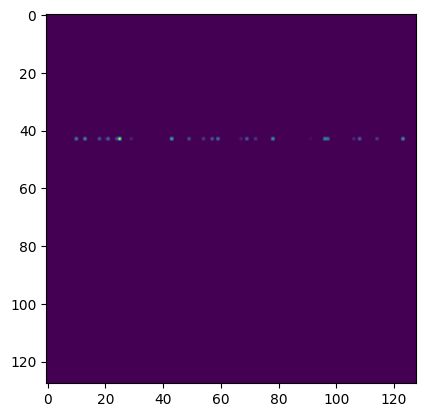

In [645]:
with torch.no_grad():
    out = autoencoder.encode(x).cpu()[:,:128]
    plt.imshow(out/(out.max() + 1e-5))

In [646]:
x

tensor([[ 0.2523, -2.2712,  0.5201,  ...,  0.7624, -0.4021,  0.7374],
        [ 2.3017, -1.6882,  0.1241,  ...,  0.2256,  0.4707,  1.0483],
        [-1.2172,  0.0509, -0.8322,  ...,  0.6485,  0.1770, -0.7193],
        ...,
        [-1.1738,  0.8410,  1.3457,  ..., -1.1372, -0.1502, -0.1591],
        [ 0.2982,  1.2405, -0.1845,  ..., -1.2686,  2.5183, -1.5507],
        [ 1.1816, -1.0091,  1.1837,  ...,  0.3506, -0.2324, -0.6876]],
       device='mps:0')

In [647]:
# print(autoencoder(x))
((autoencoder.encode(x) > 1e-5) * 1).sum(dim=1)

tensor([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 815,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0], device='mps:0')

In [362]:
torch.norm(autoencoder.decoder.weight, dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

tensor(0., device='mps:0')